#  Import libraries

In [1]:
# Import necessary libraries for data handling, math, visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Load dataset

In [ ]:
df_index = pd.read_csv("C:\\Users\\abhis\\Desktop\\Machine_Learning_project\\economic_index.csv")
df_index.head()

# Basic info

In [3]:
# Display dataset info including data types and non-null counts
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


# Drop Columns

In [5]:
# drop unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year","month"], axis=1, inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


# Correlation matrix

In [6]:
# Compute correlation between features
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


# Check missing values

In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

# plot

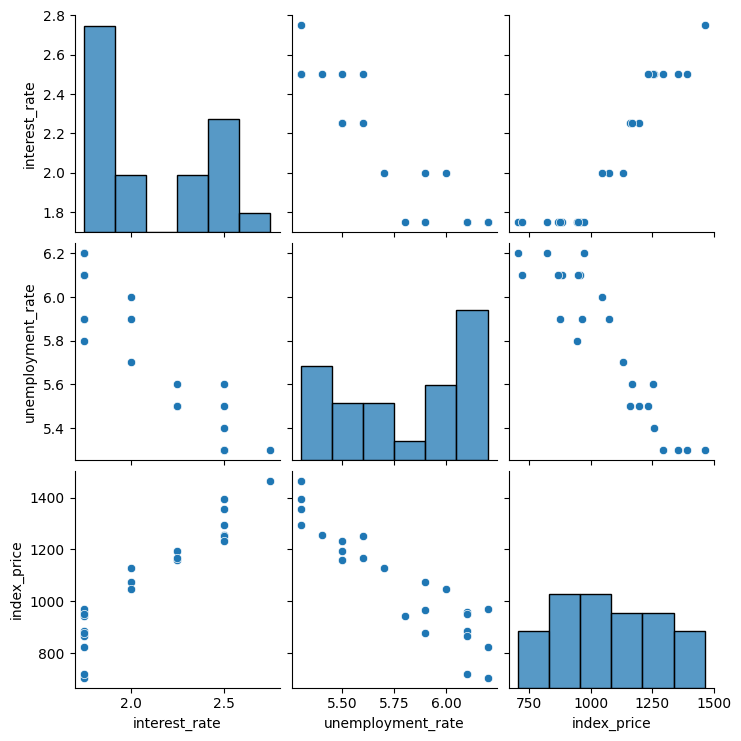

In [8]:
import seaborn as sns
sns.pairplot(df_index) 

# Scatter plot

Text(0, 0.5, 'unemployment_rate')

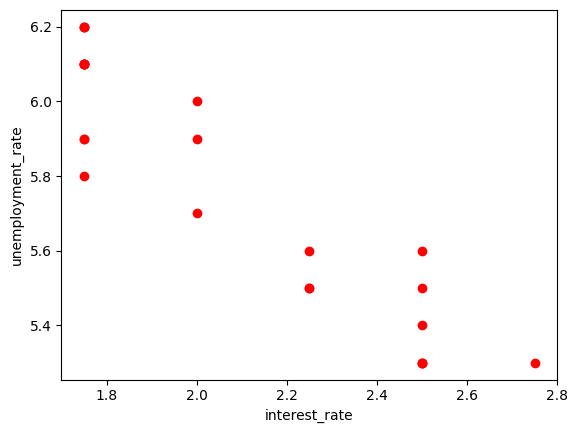

In [9]:
## Visulize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

# Define features and target

In [10]:
## independent and dependent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
X.head()


# Select independent (X) and dependent (y) variables
# X = df_index[["interest_rate", "unemployment_rate"]]
# y = df_index["index_price"]

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


# Train-test split

In [12]:
## Train test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

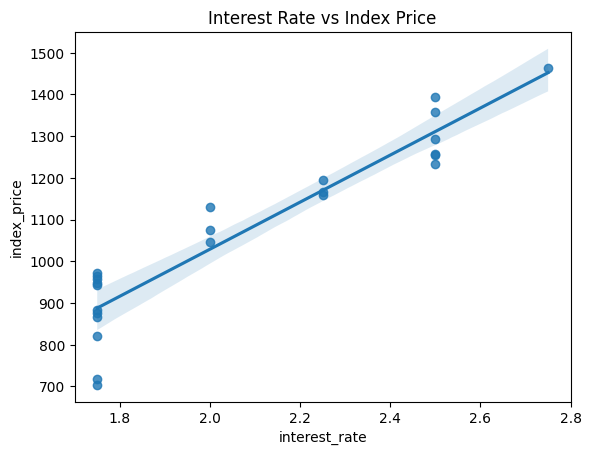

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot between interest_rate and index_price
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.title("Interest Rate vs Index Price")
plt.show()


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

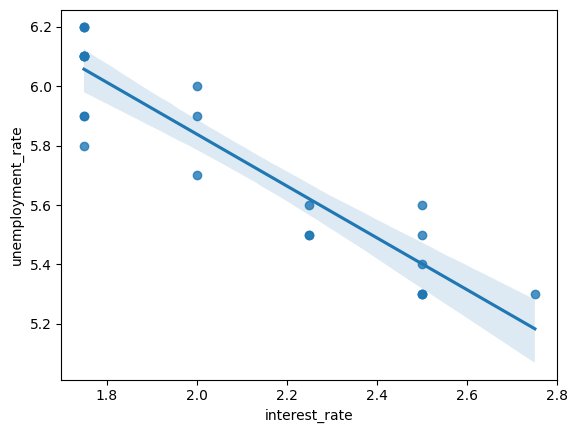

In [14]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

<Axes: xlabel='interest_rate', ylabel='index_price'>

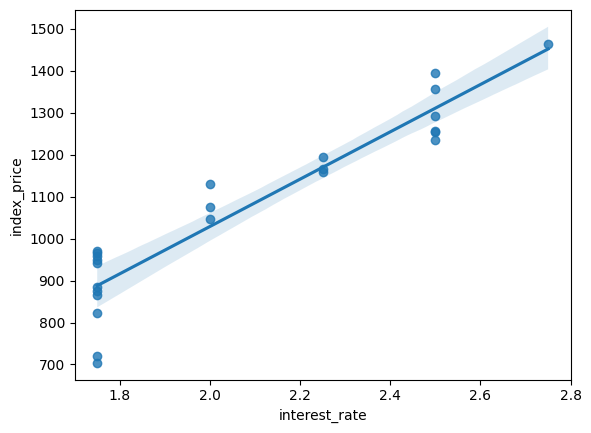

In [15]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

# Fit linear regression

In [22]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
## Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3)

In [24]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [25]:
np.mean(validation_score)

np.float64(-5914.828180162386)

# Predictions

In [27]:
# Prediction
y_pred = regression.predict(X_test_scaled)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

#  Evaluate model

In [28]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


# Assumptions

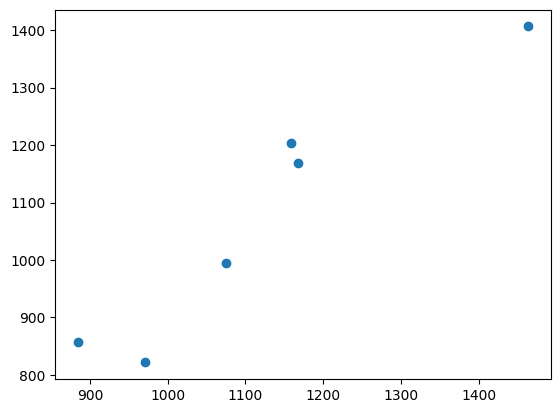

In [30]:
plt.scatter(y_test, y_pred)

In [31]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


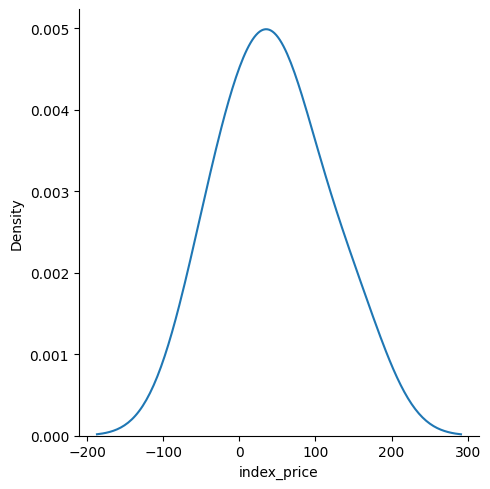

In [32]:
## Plot this residuals
sns.displot(residuals,kind='kde')

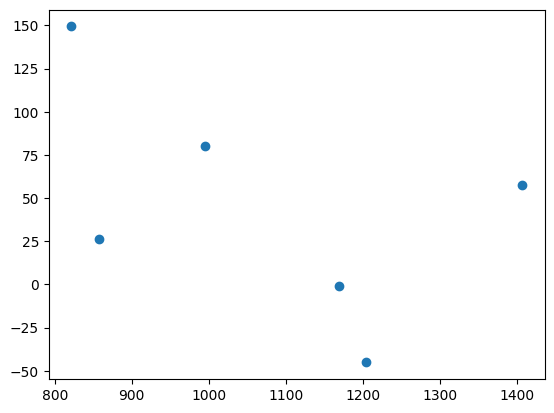

In [33]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [34]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [35]:
model.summary()

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                    7.46e-19
Time:                        18:35:55   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Coefficients

In [37]:
# Show model intercept and coefficients
regression.intercept_, regression.coef_


(np.float64(1053.4444444444443), array([  88.27275507, -116.25716066]))

# Actual vs Predicted plot

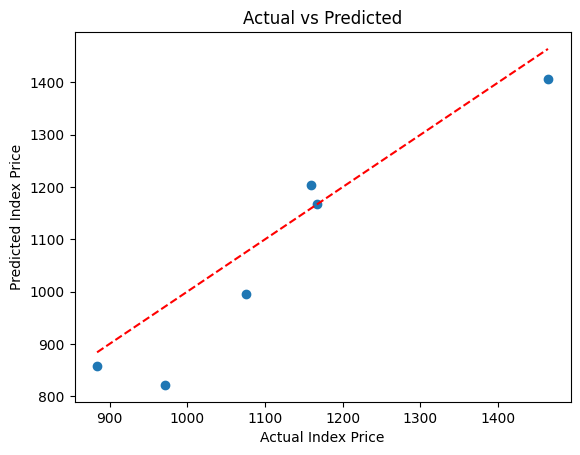

In [38]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price")
plt.title("Actual vs Predicted")
plt.show()
